<a href="https://colab.research.google.com/github/TusharKumarChopra/Car-Price-Predictor/blob/main/UsedCarPricePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/used_car_dataset.csv')


In [4]:
df

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019
...,...,...,...,...,...,...
2100,Ford Figo Titanium1.5 TDCi,₹ 3.6 Lakh,"42,158 km",Diesel,Kolkata,2015
2101,MINI Cooper Countryman Cooper D,₹ 22 Lakh,"68,862 km",Diesel,Hyderabad,2013
2102,Hyundai Verna 1.6 VTVT SX,₹ 8.38 Lakh,"37,622 km",Petrol,Chennai,2018
2103,Maruti Suzuki Ciaz VXi+ AT,₹ 6.75 Lakh,"64,726 km",Petrol,Mumbai,2017


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             2105 non-null   object
 1   car_price_in_rupees  2105 non-null   object
 2   kms_driven           2105 non-null   object
 3   fuel_type            2105 non-null   object
 4   city                 2105 non-null   object
 5   year_of_manufacture  2105 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 98.8+ KB


In [6]:
df.duplicated().sum()

92

In [7]:
df_modified = df.copy(deep=True)

In [8]:
df_modified.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019


In [9]:
df_modified = df_modified.drop_duplicates(keep='last')
df_modified = df_modified.reset_index(drop=True)

In [10]:
df_modified[~((df_modified['car_price_in_rupees'].str.contains('Lakh')) | (df_modified['car_price_in_rupees'].str.contains('Crore')))]

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
458,Tata Indica V2 DLE BS-III,"₹ 60,000","50,000 km",Diesel,Pallikarnai,2007
1544,Maruti Suzuki Estilo LXi,"₹ 99,991","29,012 km",Petrol,Kolkata,2008


In [11]:
df_modified.loc[458,'car_price_in_rupees'] = '0.6 Lakh'

In [12]:
df_modified.loc[1544, 'car_price_in_rupees'] = '0.99 Lakh'

In [13]:
df_modified[~((df_modified['car_price_in_rupees'].str.contains('Lakh')) | (df_modified['car_price_in_rupees'].str.contains('Crore')))]

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture


In [14]:
#to convert string to float
def convert_price(price):
    # Remove ₹ symbol and split the string
    price_parts = price.replace('₹', '').split()


    if 'Crore' in price_parts:
        return float(price_parts[0]) * 10000000
    elif 'Lakh' in price_parts:
        # Extract numeric value
        return float(price_parts[0]) * 100000
    else:
        return None

In [15]:
df_modified['car_price_numeric'] = df_modified['car_price_in_rupees'].apply(convert_price)

In [16]:
df_modified.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,car_price_numeric
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016,445000.0
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019,293000.0
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021,2249000.0
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016,695000.0
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019,1200000.0


In [17]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', 'Diesel + 1', 'Electric', 'CNG', 'Petrol + 1',
       'Hybrid', 'LPG'], dtype=object)

In [18]:
df['fuel_type'].value_counts()

,count
fuel_type,
Petrol,1348
Diesel,636
CNG,82
Petrol + 1,18
Electric,10
Diesel + 1,7
Hybrid,2
LPG,2


Text(0.5, 1.0, 'Count of fuels')

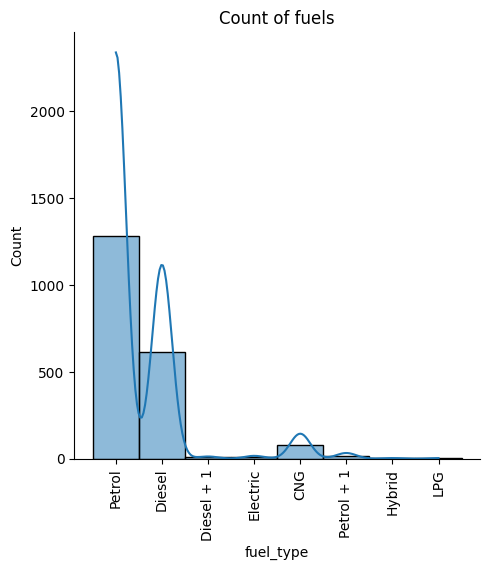

In [19]:
sns.displot(x='fuel_type',data = df_modified,kde=True)
plt.xticks(rotation=90)
plt.title('Count of fuels')

Text(0.5, 1.0, 'Price Variations Based on Fuel Type')

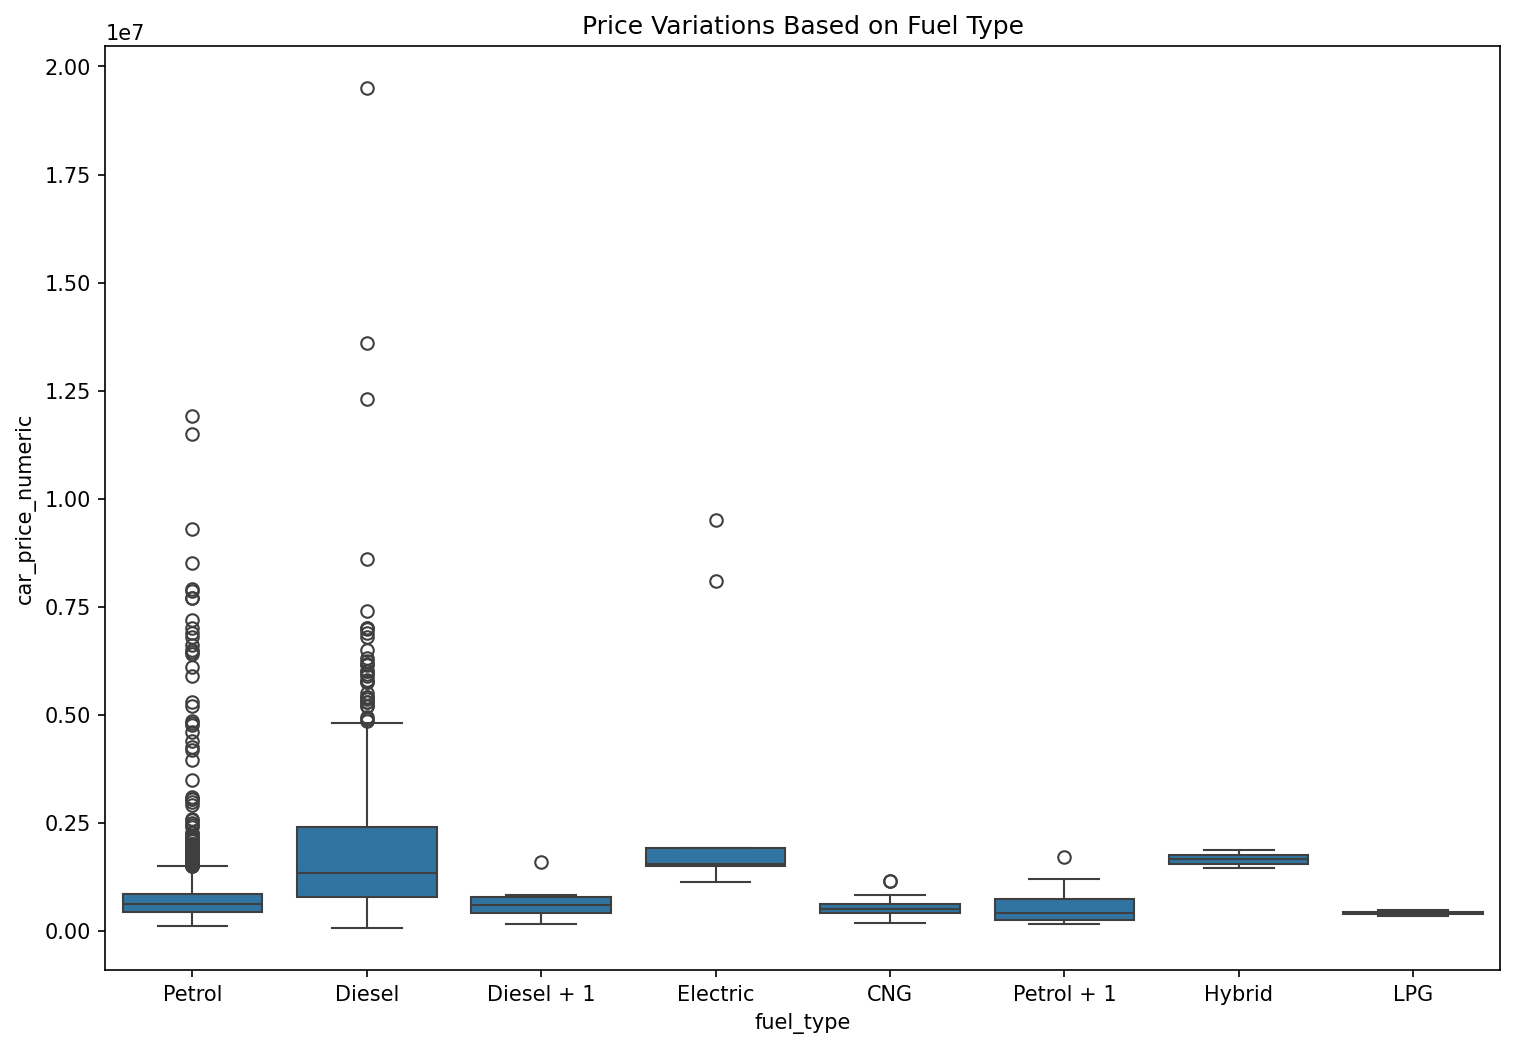

In [20]:
plt.figure(figsize=(12,8),dpi=150)
sns.boxplot(x='fuel_type',y='car_price_numeric',data=df_modified)
plt.title("Price Variations Based on Fuel Type")

In [21]:
#Top 3 fuels, remaining are others
def fuel_type(fuel):
    if fuel not in ['Petrol', 'Diesel', 'CNG']:
        fuel = "Other"
    return fuel

In [22]:
df_modified['Top_fuels'] = df_modified['fuel_type'].apply(fuel_type)

Text(0.5, 1.0, 'Price Variations Based on Fuel Type')

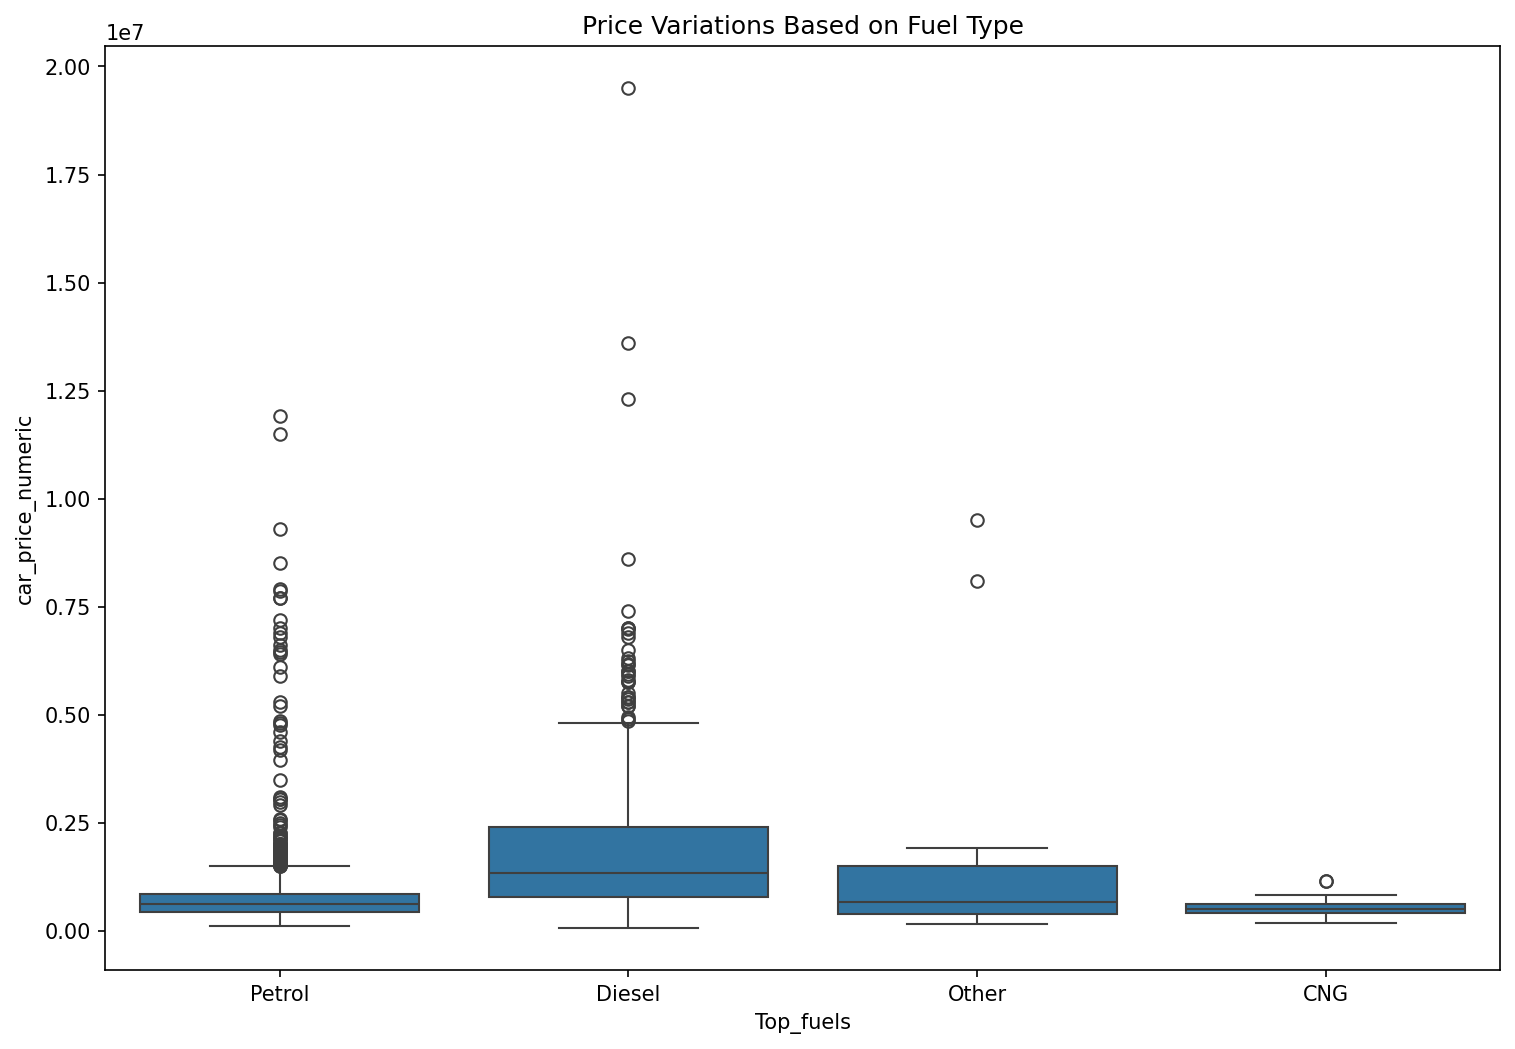

In [23]:
plt.figure(figsize=(12,8),dpi=150)
sns.boxplot(x='Top_fuels',y='car_price_numeric',data=df_modified)
plt.title("Price Variations Based on Fuel Type")

In [24]:
df_modified[(df_modified['Top_fuels'] == 'Diesel') & (df_modified['car_price_numeric'] > 17500000)]

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,car_price_numeric,Top_fuels
1306,Land Rover Range Rover 4.4 SDV8 Autobiography LWB,₹ 1.95 Crore,"45,000 km",Diesel,Ahmedabad,2018,19500000.0,Diesel


In [25]:
df_modified.drop(1306, inplace=True)
df_modified.reset_index(drop=True, inplace=True)

In [26]:
df_modified[(df_modified['Top_fuels'] == 'Diesel') & (df_modified['car_price_numeric'] > 17500000)]

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,car_price_numeric,Top_fuels


Text(0.5, 1.0, 'Price Variations Based on Fuel Type')

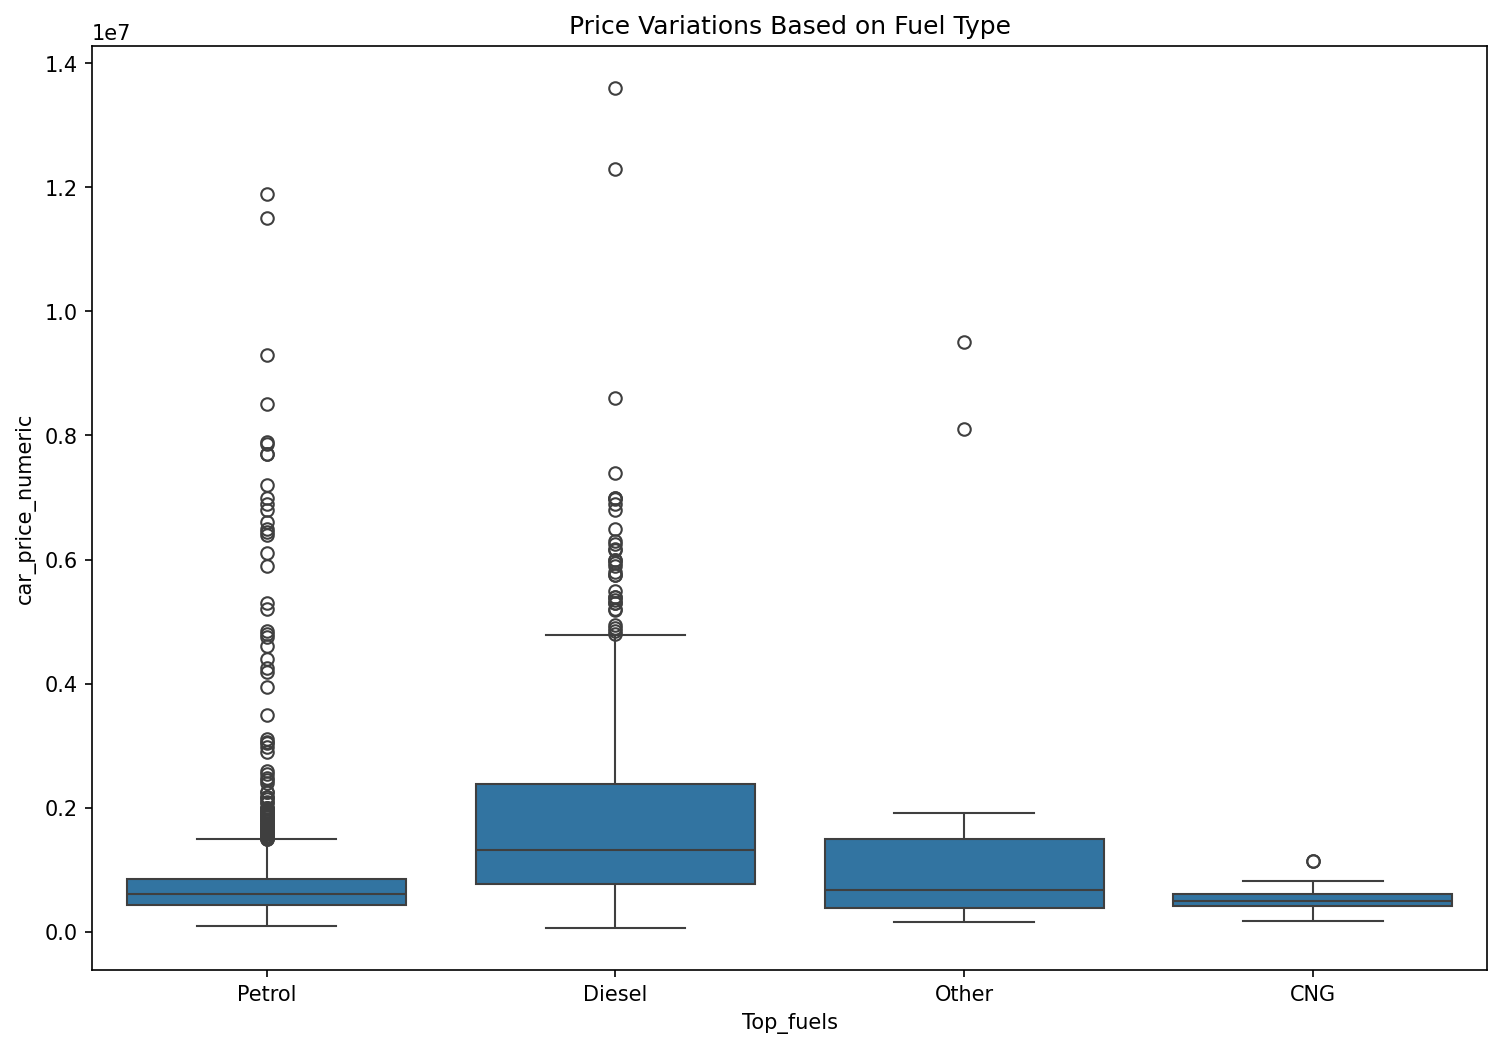

In [27]:
plt.figure(figsize=(12,8),dpi=150)
sns.boxplot(x='Top_fuels',y='car_price_numeric',data=df_modified)
plt.title("Price Variations Based on Fuel Type")

In [28]:
df_modified['kms_driven_numeric'] = df_modified['kms_driven'].str.replace(',', '').str.replace('km', '').astype(dtype=int)

In [29]:
df_modified

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,car_price_numeric,Top_fuels,kms_driven_numeric
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016,445000.0,Petrol,22402
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019,293000.0,Petrol,10344
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021,2249000.0,Diesel,12999
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016,695000.0,Petrol,45000
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019,1200000.0,Petrol,11193
...,...,...,...,...,...,...,...,...,...
2007,Ford Figo Titanium1.5 TDCi,₹ 3.6 Lakh,"42,158 km",Diesel,Kolkata,2015,360000.0,Diesel,42158
2008,MINI Cooper Countryman Cooper D,₹ 22 Lakh,"68,862 km",Diesel,Hyderabad,2013,2200000.0,Diesel,68862
2009,Hyundai Verna 1.6 VTVT SX,₹ 8.38 Lakh,"37,622 km",Petrol,Chennai,2018,838000.0,Petrol,37622
2010,Maruti Suzuki Ciaz VXi+ AT,₹ 6.75 Lakh,"64,726 km",Petrol,Mumbai,2017,675000.0,Petrol,64726


<Axes: xlabel='year_of_manufacture', ylabel='car_price_numeric'>

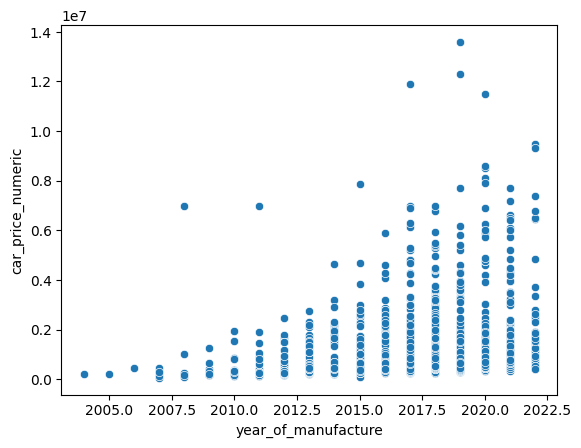

In [30]:
sns.scatterplot(data=df_modified, x='year_of_manufacture', y='car_price_numeric')

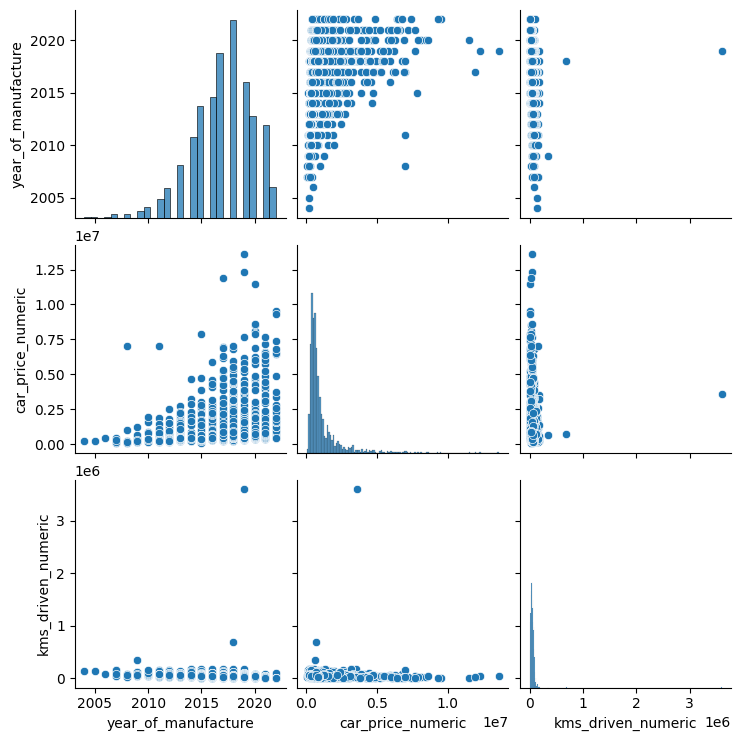

In [31]:
sns.pairplot(df_modified)

In [32]:
df_modified[(df_modified['kms_driven_numeric'] > 3000000) & (df_modified['car_price_numeric'] > 2500000)]

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,car_price_numeric,Top_fuels,kms_driven_numeric
394,BMW 3 Series GT 320d Luxury Line [2014-2016],₹ 36 Lakh,"36,00,000 km",Diesel,Pune,2019,3600000.0,Diesel,3600000


In [33]:
df_modified.drop(394, inplace=True)
df_modified.reset_index(drop=True, inplace=True)

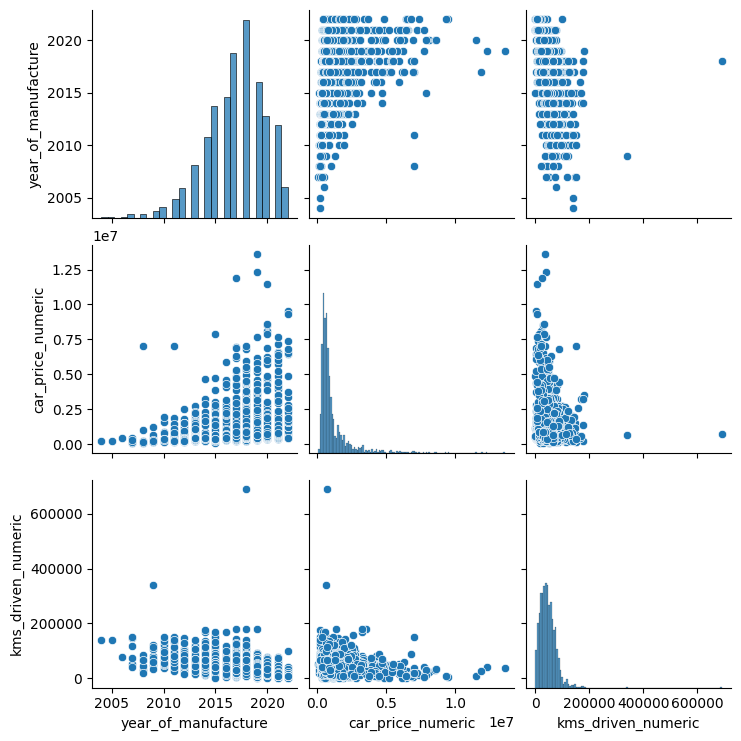

In [34]:
sns.pairplot(df_modified)

In [35]:
df_modified[(df_modified['kms_driven_numeric'] > 600000) & (df_modified['car_price_numeric'] < 2500000)]

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,car_price_numeric,Top_fuels,kms_driven_numeric
1165,Maruti Suzuki Baleno Zeta Automatic,₹ 6.9 Lakh,"6,90,000 km",Petrol,Thane,2018,690000.0,Petrol,690000


In [36]:
df_modified.drop(1165, inplace=True)
df_modified.reset_index(drop=True, inplace=True)

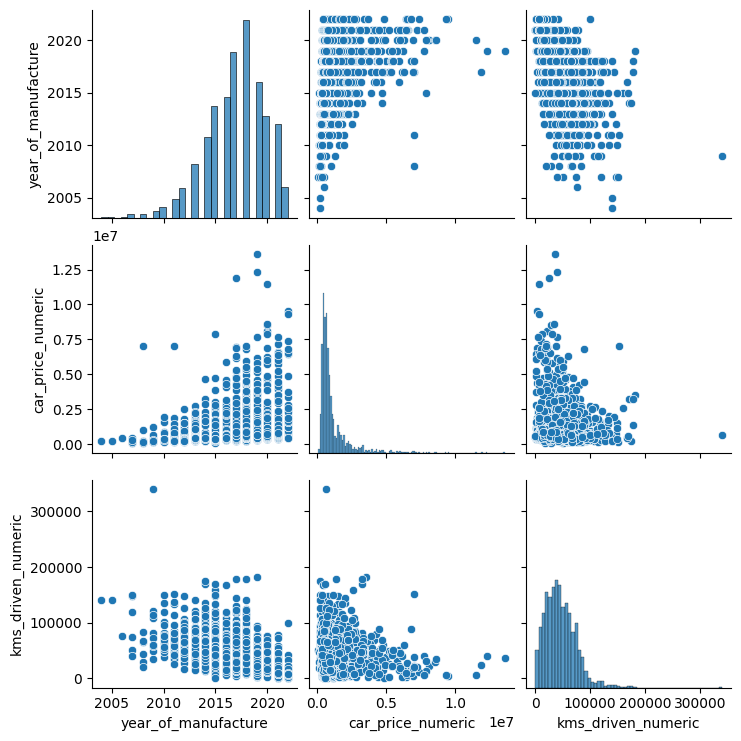

In [37]:
sns.pairplot(df_modified)

In [38]:
df_modified[df_modified['kms_driven_numeric'] > 300000]

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,car_price_numeric,Top_fuels,kms_driven_numeric
871,Toyota Innova 2.5 G2,₹ 6.5 Lakh,"3,40,000 km",Diesel,Pallikarnai,2009,650000.0,Diesel,340000


In [39]:
df_modified.drop(871, inplace=True)
df_modified.reset_index(drop=True, inplace=True)

In [40]:
df_modified['city'].unique()

array(['Mumbai', 'Kolkata', 'Bangalore', 'Thane', 'Chennai', 'Ahmedabad',
       'Pallikarnai', 'Hyderabad', 'Pune', 'Gurgaon', 'Delhi', 'Noida',
       'Faridabad', 'Thiruvallur', 'Ambattur', 'Poonamallee'],
      dtype=object)

In [41]:
df_modified['city'].value_counts()


,count
city,
Bangalore,240
Hyderabad,240
Thane,238
Ahmedabad,238
Kolkata,234
Mumbai,232
Pune,224
Delhi,174
Chennai,75


In [42]:
def cityfilter(city):
  lis =  ['Bangalore', 'Hyderabad', 'Thane', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Pune', 'Delhi', 'Chennai']
  if city in lis:
    return city
  else:
    return 'Other'

In [43]:
df_modified['Top_city'] = df_modified['city'].apply(cityfilter)

<Axes: xlabel='Top_city', ylabel='car_price_numeric'>

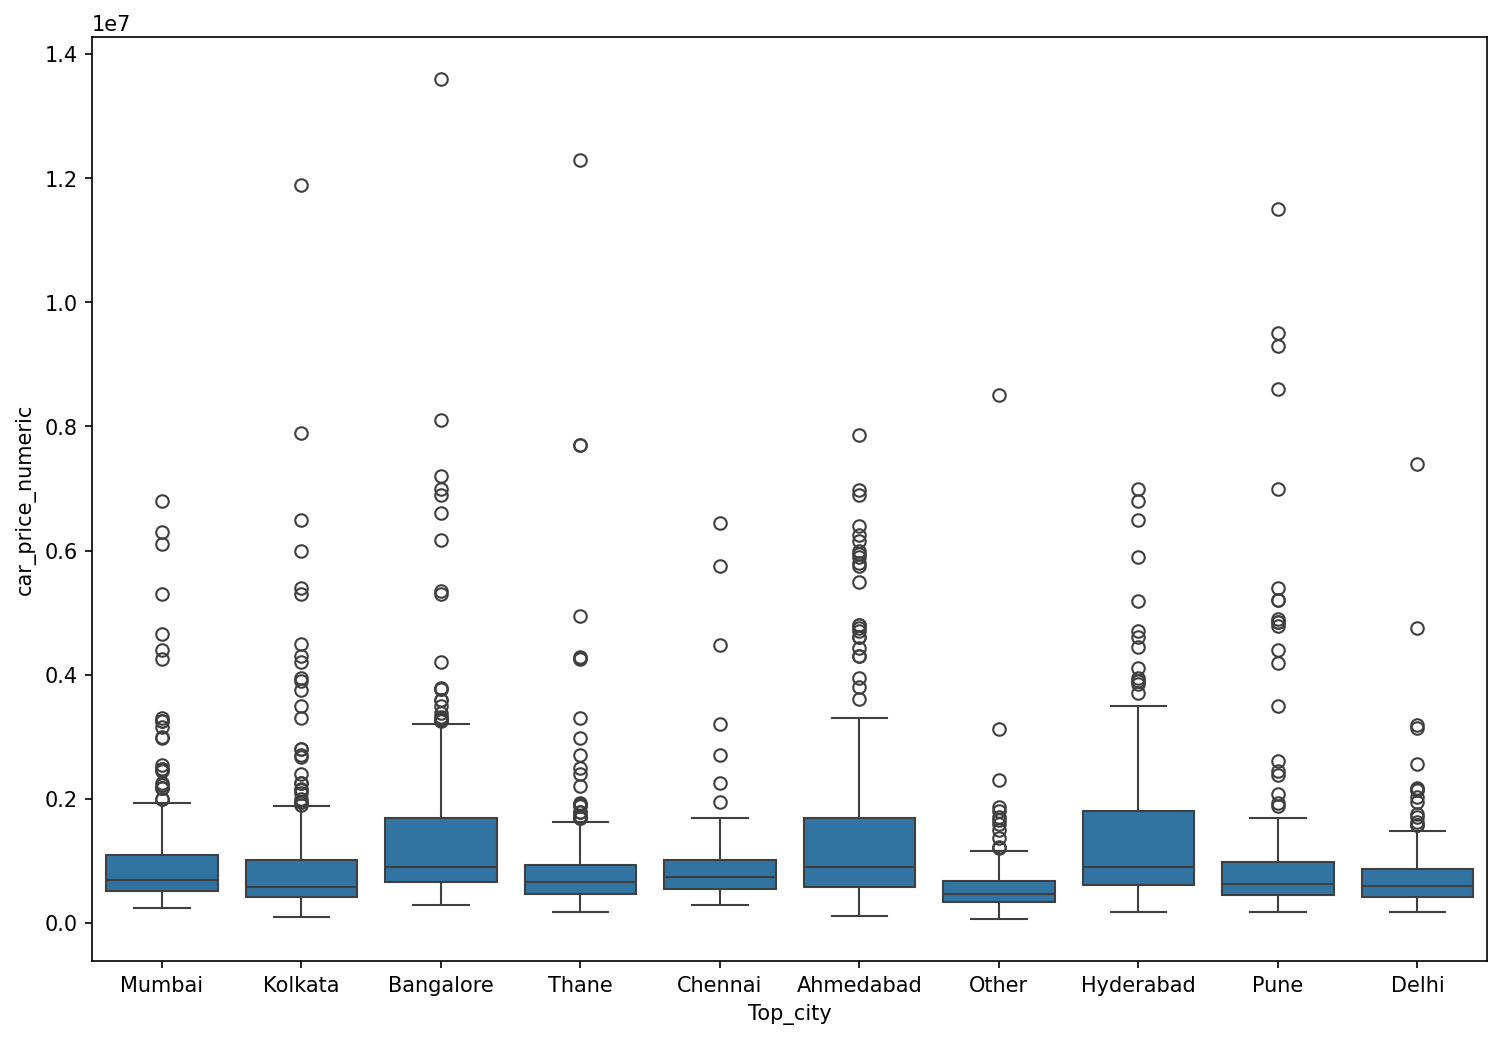

In [44]:
plt.figure(figsize=(12,8),dpi=150)
sns.boxplot(x='Top_city',y='car_price_numeric',data=df_modified)

In [45]:
df_modified[(df_modified['Top_city'] == 'Bangalore') & (df_modified['car_price_numeric'] > 12000000)]

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,car_price_numeric,Top_fuels,kms_driven_numeric,Top_city
1754,Land Rover Range Rover Sport SE 3.0 Diesel [20...,₹ 1.36 Crore,"36,000 km",Diesel,Bangalore,2019,13600000.0,Diesel,36000,Bangalore


In [46]:
df_modified.drop(1754, inplace=True)
df_modified.reset_index(drop=True, inplace=True)

In [47]:
df_modified[(df_modified['Top_city'] == 'Thane') & (df_modified['car_price_numeric'] > 12000000)]

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,car_price_numeric,Top_fuels,kms_driven_numeric,Top_city
286,Land Rover Range Rover Sport SDV6 SE,₹ 1.23 Crore,"39,012 km",Diesel,Thane,2019,12300000.0,Diesel,39012,Thane


In [48]:
df_modified.drop(286, inplace=True)
df_modified.reset_index(drop=True, inplace=True)

In [49]:
def Type_of_Car(price):
  if price <= 800000:
    return 'Budget'
  elif price > 800000 and price <= 2000000:
    return 'MidRange'
  elif price >2000000 and price < 10000000:
    return 'Luxury'
  else:
      return 'UltraLuxury'

In [50]:
df_modified['Category'] = df_modified['car_price_numeric'].apply(Type_of_Car)

In [51]:
def brand_name(brand):
    return brand.split()[0]


In [52]:
df_modified['brand'] = df_modified['car_name'].apply(brand_name)

In [53]:
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             2007 non-null   object 
 1   car_price_in_rupees  2007 non-null   object 
 2   kms_driven           2007 non-null   object 
 3   fuel_type            2007 non-null   object 
 4   city                 2007 non-null   object 
 5   year_of_manufacture  2007 non-null   int64  
 6   car_price_numeric    2007 non-null   float64
 7   Top_fuels            2007 non-null   object 
 8   kms_driven_numeric   2007 non-null   int64  
 9   Top_city             2007 non-null   object 
 10  Category             2007 non-null   object 
 11  brand                2007 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 188.3+ KB


Text(0.5, 1.0, 'Count of all Brands')

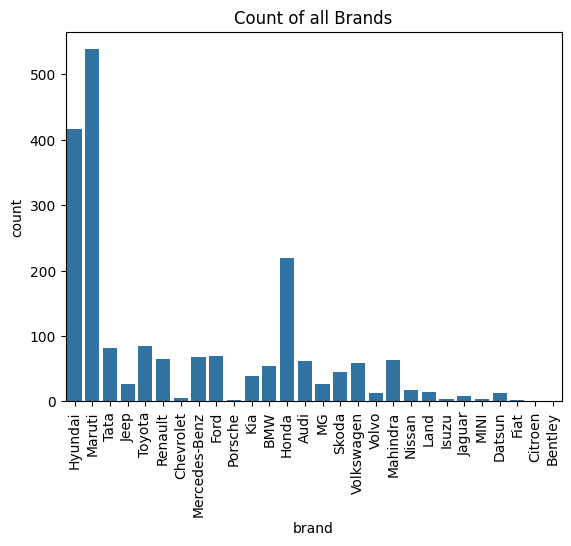

In [54]:
sns.countplot(data=df_modified,x='brand')
plt.xticks(rotation=90)
plt.title('Count of all Brands')

In [55]:
df_modified['brand'].value_counts()

,count
brand,
Maruti,538
Hyundai,417
Honda,220
Toyota,85
Tata,81
Ford,69
Mercedes-Benz,68
Renault,65
Mahindra,64


In [56]:
df_modified = df_modified[df_modified['brand'].apply(lambda x: df_modified['brand'].value_counts().get(x, 0) > 20)]

In [57]:
df_modified['brand'].value_counts()

,count
brand,
Maruti,538
Hyundai,417
Honda,220
Toyota,85
Tata,81
Ford,69
Mercedes-Benz,68
Renault,65
Mahindra,64


In [60]:
X = df_modified.drop(['car_name','car_price_in_rupees','kms_driven','fuel_type','city', 'car_price_in_rupees', 'car_price_numeric'],axis=1)
y = df_modified['car_price_numeric']

In [61]:
X

,year_of_manufacture,Top_fuels,kms_driven_numeric,Top_city,Category,brand
0,2016,Petrol,22402,Mumbai,Budget,Hyundai
1,2019,Petrol,10344,Kolkata,Budget,Maruti
2,2021,Diesel,12999,Bangalore,Luxury,Tata
3,2016,Petrol,45000,Thane,Budget,Maruti
4,2019,Petrol,11193,Kolkata,MidRange,Jeep
...,...,...,...,...,...,...
2001,2014,Petrol,66250,Ahmedabad,Budget,Hyundai
2002,2015,Diesel,42158,Kolkata,Budget,Ford
2004,2018,Petrol,37622,Chennai,MidRange,Hyundai
2005,2017,Petrol,64726,Mumbai,Budget,Maruti


In [62]:
X = pd.get_dummies(X, columns=['brand', 'Top_fuels','Top_city','Category'], drop_first=True)  # One-hot encoding


Text(0.5, 1.0, 'Correlation Heatmap')

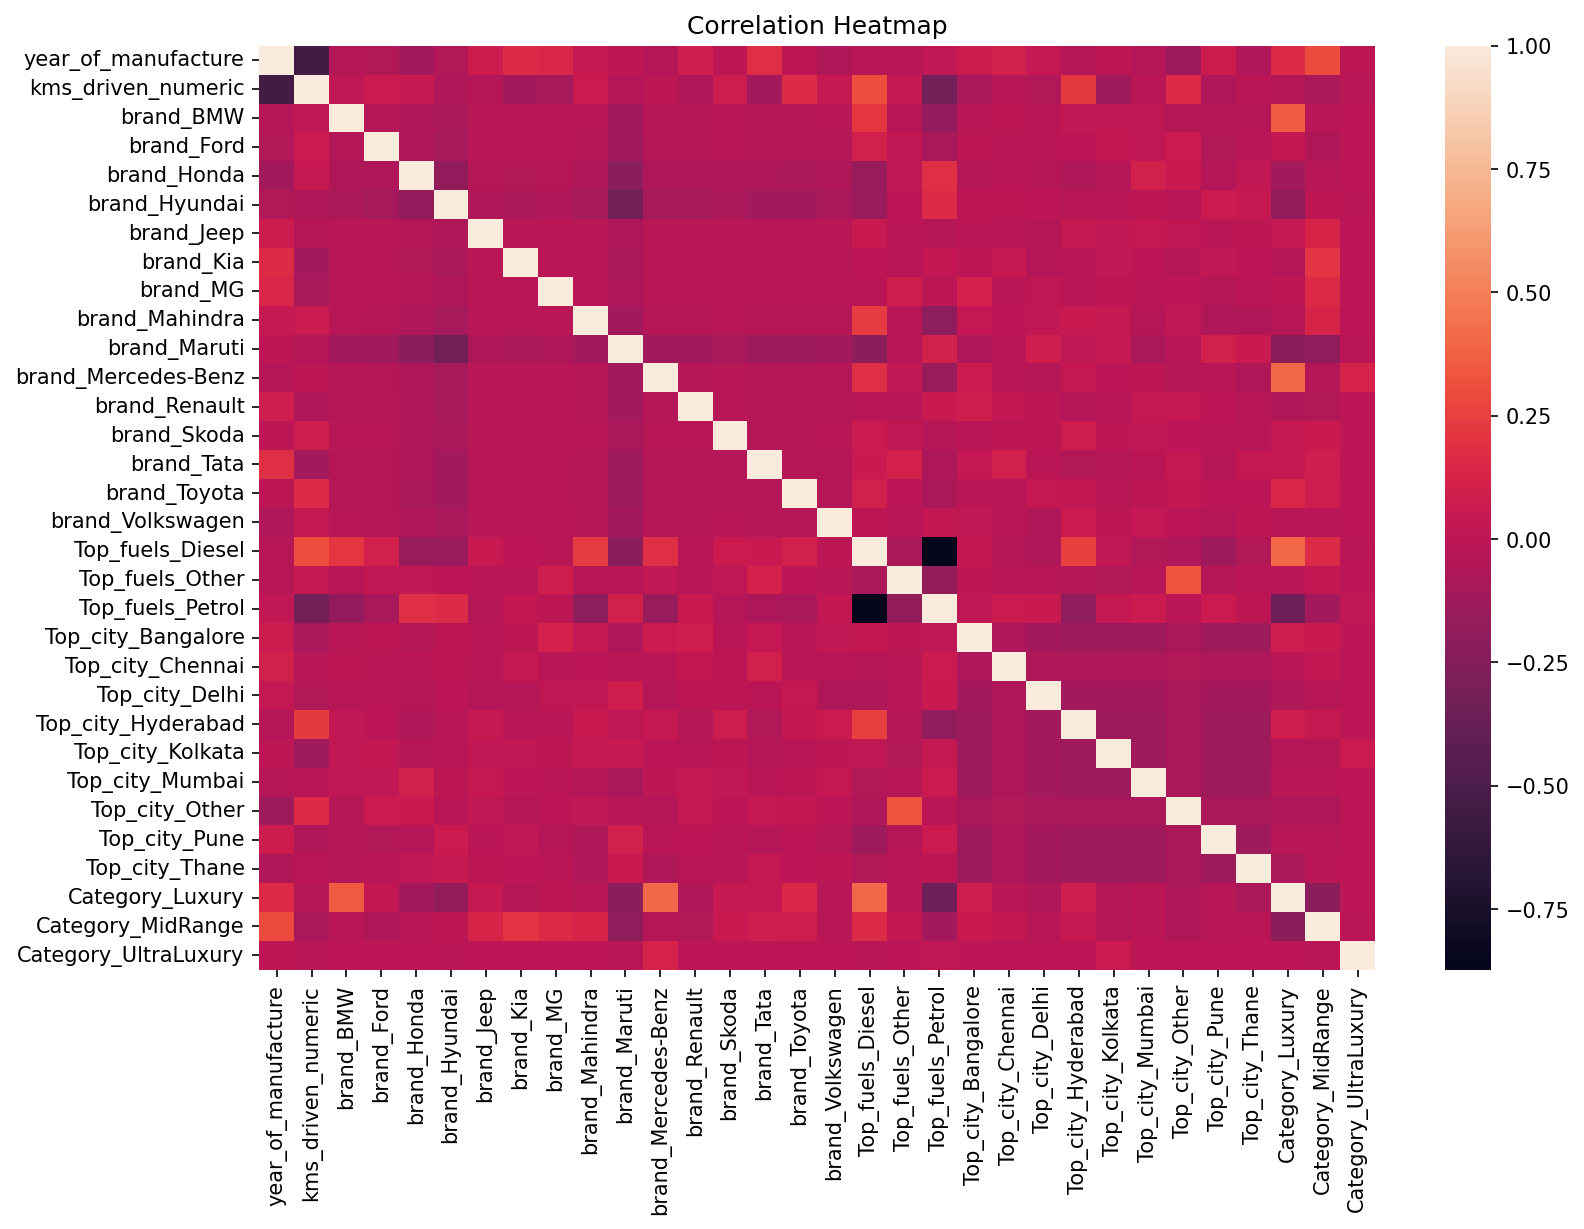

In [63]:
plt.figure(figsize=(12,8),dpi=150)
sns.heatmap(X.corr())
plt.title('Correlation Heatmap')

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
scaler = StandardScaler()

In [68]:
scaler.fit(X_train)

StandardScaler()

In [69]:
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [70]:
from sklearn.linear_model import ElasticNet

In [71]:
model = ElasticNet(max_iter=1000000)

In [72]:
param_grid = {'alpha':[0.1,1,5,10],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1)

In [75]:
grid_model.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=ElasticNet(max_iter=1000000),
             param_grid={'alpha': [0.1, 1, 5, 10],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [76]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 1}

In [77]:
grid_model.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=1, max_iter=1000000)

In [78]:
y_pred = grid_model.predict(scaled_X_test)

In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MSE = mean_absolute_error(y_test, y_pred)


In [80]:
np.sqrt(mean_squared_error(y_test,y_pred))

509085.25208970136

In [81]:
from sklearn.linear_model import ElasticNetCV

In [82]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01)


In [83]:
elastic_model.fit(scaled_X_train,y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], tol=0.01)

In [84]:
test_predictions = elastic_model.predict(scaled_X_test)

In [85]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [86]:
MAE

238714.5622628409

In [87]:
RMSE

508889.59600411233

In [88]:
best_params = grid_model.best_params_
Best_Estimator = grid_model.best_estimator_
print(Best_Estimator)

print("Best Parameters:", best_params)

# Predict using the best estimator on test data
predicted_values_best = Best_Estimator.predict(scaled_X_test)
print("Predicted values for scaled test data using best estimator:", predicted_values_best)


ElasticNet(alpha=0.1, l1_ratio=1, max_iter=1000000)
Best Parameters: {'alpha': 0.1, 'l1_ratio': 1}
Predicted values for scaled test data using best estimator: [ 716597.26018595  954233.90660136 1169959.86587051  734950.47982772
  542350.30308371  239645.17573379  396094.87535012 1261662.9098362
  174149.04187577 3255259.02177442 1336674.87699177  521516.29876537
  551004.32616172  338804.92777268 1516826.39340962  602245.41768491
  664495.0807082  1467579.72246843  994225.32003133  412891.23110107
  726702.7293326   720831.30634019  470513.07350843  389510.5604375
  607207.0021846   245931.72056639  978588.96953285 1589595.94500659
  121296.75894974  186489.17403202  434967.92933274  929610.21240939
  605670.17500826 1001560.81971438  720008.77286232  454710.44768826
  446346.53736505  188080.18823424 1595914.92337855 1080975.02635316
 2994471.57045179  -34697.95398766 3743969.09399331 3493632.47869246
 4122490.62744282  659842.37324902  548429.86891654  553928.51592919
 1286352.340558

In [89]:
from sklearn.metrics import r2_score

In [90]:
r2_score(y_pred=test_predictions, y_true=y_test)

0.7962437731496964